# to-do
1. Check behaviour of phi_nl and sph_harm_lm
2. Check scale of sph_harm at higher terms.
3. Is the potential affected by this high order terms?
4. Check that the derivation of A_nl is correct.
5. Check the behaviour of the energy term
6. Check the effect of not choosing the right scale length

In [1]:
%pylab inline
from scipy import special
#plt.style.use('dark_background')
import biff
import pygadgetreader
#from gala.potential.scf import compute_coeffs, compute_coeffs_discrete

Populating the interactive namespace from numpy and matplotlib


In [2]:
font = {'size':18, 'family':'serif'}
matplotlib.rc('font', **font)

In [3]:
def xi_transformation(r):
    return (r-1)/(r+1)

def Anl(n, l):
    knl = 0.5*n*(n+4*l+3) + (l+1)*(2*l+1)
    A_nl = - 2**(8*l+6)/(4*np.pi*knl) * (special.factorial(n)*(n+2*l+3/2.)*(special.gamma(2*l+3/2.))**2)/(special.gamma(n+4*l+3))
    return A_nl

def phi_nl(n, l, r, a):
    xi = xi_transformation(r)
    return - special.eval_gegenbauer(n, 2*l + 3/2., xi)*(4*np.pi)**(0.5)*(r/a)**l/((1+r/a)**(2*l+1))  

def rho_nl(n, l, r, a):
    xi = xi_transformation(r)
    knl = 0.5*n*(n+4*l+3) + (l+1)*(2*l+1)

    return knl/(2*np.pi) * special.eval_gegenbauer(n, 2*l + 3/2., xi)*(4*np.pi)**(0.5)*(r/a)**l/((1+r/a)**(2*l+3))  

In [4]:
def snl(n, l, m, m_p, r_p, theta_p, phi_p, a):
    A_nl = Anl(n,l)
    if m==0:
        S_nl = A_nl * np.sum(m_p*phi_nl(n, l, r_p, a)*special.sph_harm(m, l, 0, theta_p)*np.cos(m*phi_p))
        print(np.sum(phi_nl(n, l, r_p, a)), np.sum(special.sph_harm(m, l, 0, theta_p)), A_nl)
    if m!=0:
        S_nl = 2.*A_nl * np.sum(m_p*phi_nl(n, l, r_p, a)*special.sph_harm(m, l, 0, theta_p)*np.cos(m*phi_p))
    return S_nl.real, np.sum(phi_nl(n, l, r_p, a)), np.sum(special.sph_harm(m, l, 0, theta_p))

In [5]:
theta_t = np.linspace(0, np.pi, 100)
sph_harm_matrix = np.zeros((20, 100))
for l in range(0, 20):
    sph_harm_matrix[l] = special.sph_harm(0, l, 0, theta_t)

/home/xzk/.local/lib/python3.5/site-packages/ipykernel_launcher.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  after removing the cwd from sys.path.


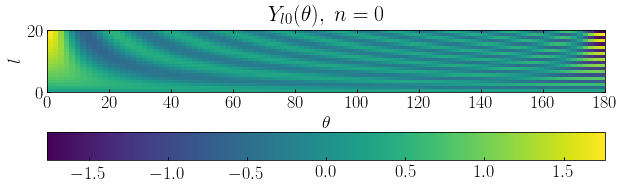

In [6]:
figure(figsize=(10, 5))
title(r'$Y_{l0}(\theta),\ n=0$')
imshow(sph_harm_matrix, origin='lower', extent=[0, 180, 0, 20], cmap='viridis')
colorbar(orientation='horizontal')
ylabel('$l$')
xlabel(r'$\theta$')

savefig('spherical_harmonics_theta_dependence.png', bbox_inches='tight')
savefig('spherical_harmonics_theta_dependence.pdf', bbox_inches='tight')

In [7]:
r_t = np.logspace(0, 2, 100)
phi_nl_matrix = np.zeros((20, 100))
for l in range(0, 20):
    phi_nl_matrix[l] = phi_nl(0, l, r_t, 1)

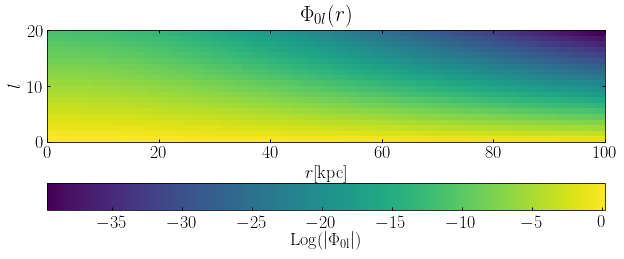

In [8]:
figure(figsize=(10, 5))
title(r'$\Phi_{0l}(r)$')
imshow(np.log10(np.abs(phi_nl_matrix)), origin='lower', extent=[0, 100, 0, 20], cmap='viridis')
cbar = colorbar(orientation='horizontal')
ylabel('$l$')
xlabel('$r$[kpc]')
cbar.set_label(r'$\rm{Log}(|\Phi_{0l}|)$')

savefig('phi_nl_radial_depndence.pdf', bbox_inches='tight')

In [9]:
# Que pasa con esta linea? 
phi_nl_matrix[:,0]

array([ -1.77245385e+00,  -4.43113463e-01,  -1.10778366e-01,
        -2.76945914e-02,  -6.92364786e-03,  -1.73091196e-03,
        -4.32727991e-04,  -1.08181998e-04,  -2.70454994e-05,
        -6.76137486e-06,  -1.69034371e-06,  -4.22585929e-07,
        -1.05646482e-07,  -2.64116205e-08,  -6.60290514e-09,
        -1.65072628e-09,  -4.12681571e-10,  -1.03170393e-10,
        -2.57925982e-11,  -6.44814955e-12])

In [10]:
product_matrix = np.zeros((20, 100))
for l in range(0, 20):
    product_matrix[l] = phi_nl(0, l, r_t, 1) * special.sph_harm(0, l, 0, theta_t).real

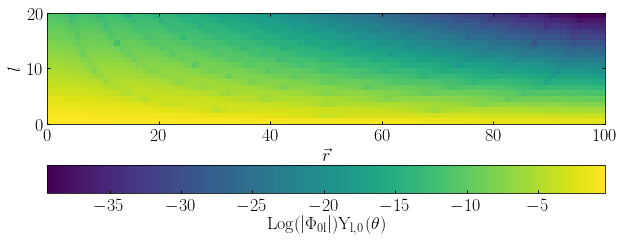

In [11]:
figure(figsize=(10, 5))
imshow(np.log10(np.abs(product_matrix)), origin='lower', extent=[0, 100, 0, 20], cmap='viridis')
cbar = colorbar(orientation='horizontal')
ylabel('$l$')
xlabel(r'$\vec{r}$')
cbar.set_label(r'$\rm{Log}(|\Phi_{0l}|) Y_{l,0}(\theta)$')

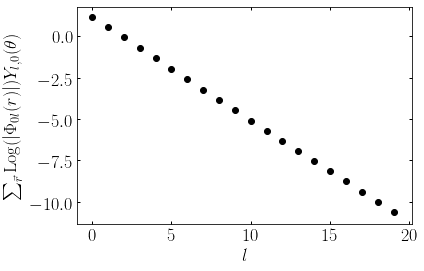

In [12]:
for i in range(20):
    scatter(i, np.log10(np.abs(np.sum(product_matrix[i]))), c='k')
xlabel('$l$')
ylabel(r'$\sum_{\vec{r}} \mathrm{Log}(|\Phi_{0l}(r)|) Y_{l,0}(\theta)$')

savefig('sum_prodcut_matrix_l.pdf', bbox_inches='tight')

In [56]:
# data:
spherical_halo = pygadgetreader.readsnap('../data/hern_halo_1E5_010', 'pos', 'dm')
spherical_halo_m = pygadgetreader.readsnap('../data/hern_halo_1E5_010', 'mass', 'dm')


oblate_halo = pygadgetreader.readsnap('../data/oblate_hern_halo_1E5_010', 'pos', 'dm')
oblate_halo_m = pygadgetreader.readsnap('../data/oblate_hern_halo_1E5_010', 'mass', 'dm')


spherical_halo_2 = pygadgetreader.readsnap('../data/hern_halo_1E6_010', 'pos', 'dm')
spherical_halo_m_2 = pygadgetreader.readsnap('../data/hern_halo_1E6_010', 'mass', 'dm')

spherical_halo_3 = pygadgetreader.readsnap('../data/hern_halo_1E7_010', 'pos', 'dm')
spherical_halo_m_3 = pygadgetreader.readsnap('../data/hern_halo_1E7_010', 'mass', 'dm')

#spherical_halo = pygadgetreader.readsnap('../data/LMC1_97K_vir_000', 'pos', 'dm')

#m = pygadgetreader.readsnap('../data/LMC3_2M_vir_009', 'mass', 'dm')

Returning DM    Positions
Returning DM    Mass
Returning DM    Positions
Returning DM    Mass
Returning DM    Positions
Returning DM    Mass
Returning DM    Positions
Returning DM    Mass


In [57]:
x = spherical_halo[:,0]
y = spherical_halo[:,1]
z = spherical_halo[:,2]
m = spherical_halo_m

x_o = oblate_halo[:,0]
y_o = oblate_halo[:,1]
z_o = oblate_halo[:,2]
m_o = oblate_halo_m


x_2 = spherical_halo_2[:,0]
y_2 = spherical_halo_2[:,1]
z_2 = spherical_halo_2[:,2]
m_2 = spherical_halo_m_2


x_3 = spherical_halo_3[:,0]
y_3 = spherical_halo_3[:,1]
z_3 = spherical_halo_3[:,2]
m_3 = spherical_halo_m_3

In [59]:
r = (x**2 + y**2 + z**2)**0.5
index_rcut = np.where(r<100)

x_cut = x[index_rcut]
y_cut = y[index_rcut]
z_cut = z[index_rcut]
m_cut = m[index_rcut]
r_cut = (x_cut**2 + y_cut**2 + z_cut**2)**0.5


r_o = (x_o**2 + y_o**2 + z_o**2)**0.5
index_rcut_o = np.where(r_o<100)

x_cut_o = x_o[index_rcut_o]
y_cut_o = y_o[index_rcut_o]
z_cut_o = z_o[index_rcut_o]
m_cut_o = m_o[index_rcut_o]
r_cut_o = (x_cut_o**2 + y_cut_o**2 + z_cut_o**2)**0.5

r2 = (x_2**2 + y_2**2 + z_2**2)**0.5

index_rcut2 = np.where(r2<100)

x_cut2 = x_2[index_rcut2]
y_cut2 = y_2[index_rcut2]
z_cut2 = z_2[index_rcut2]
m_cut2 = m_2[index_rcut2]
r_cut2 = (x_cut2**2 + y_cut2**2 + z_cut2**2)**0.5

In [60]:
r3 = (x_3**2 + y_3**2 + z_3**2)**0.5
index_rcut3 = np.where(r3<100)

x_cut3 = x_3[index_rcut3]
y_cut3 = y_3[index_rcut3]
z_cut3 = z_3[index_rcut3]
m_cut3 = m_3[index_rcut3]
r_cut3 = (x_cut3**2 + y_cut3**2 + z_cut3**2)**0.5

(-100, 100)

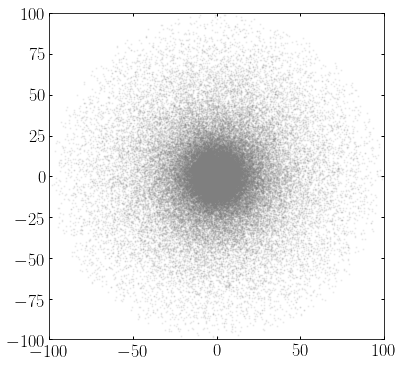

In [17]:
figsize(6,6)
scatter(x_cut, z_cut, s=1, alpha=0.1, c='C7')
xlim(-100, 100)
ylim(-100, 100)


(-100, 100)

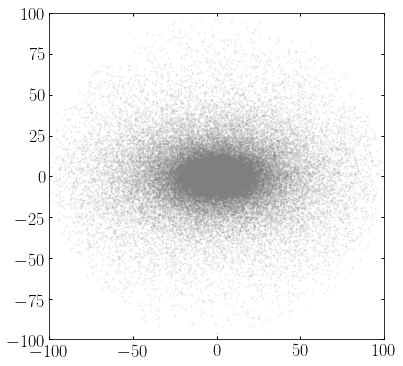

In [18]:
figsize(6,6)
scatter(x_cut_o, z_cut_o, s=1, alpha=0.1, c='C7')
xlim(-100, 100)
ylim(-100, 100)

In [51]:
theta = np.arccos(z_cut/r_cut)
phi = np.arctan2(y_cut, x_cut)


#theta2 = np.arccos(z_cut2/r_cut2)
#phi2 = np.arctan2(y_cut2, x_cut2)


In [19]:
snl(0, 0, 0, m_cut, r_cut, theta, phi, 40.8)

-151968.390671 (20080.9177524+0j) -3.0


(154.33824671743935, -151968.39067062637, (20080.917752423524+0j))

In [20]:
snl(10, 10, 0, m_cut, r_cut, theta, phi, 40.8)

-423516125.138 (-61.386129218+0j) -2.16078783072


(-2854.4169960961558, -423516125.13782847, (-61.386129218010971+0j))

In [21]:
spherical_halo[index_rcut]

array([[-24.1621933 ,  12.91808414,   1.11863124],
       [ -6.43855381,  21.80490112, -11.13853264],
       [ -2.88431549,   6.1406126 , -22.44001961],
       ..., 
       [ 42.49369812, -30.07404709, -20.77810669],
       [-28.78679085, -10.97197533,  77.00736237],
       [ -7.62183142,  14.02430725, -16.82109642]], dtype=float32)

In [19]:
S_biff, T_biff = biff.compute_coeffs_discrete(np.double(spherical_halo[index_rcut]), np.double(m_cut), 10, 20, skip_m=False, r_s=40.8)

In [20]:
S_biff_o, T_biff_o = biff.compute_coeffs_discrete(np.double(oblate_halo[index_rcut_o]), np.double(m_cut_o), 10, 20, skip_m=False, r_s=40.8)

In [61]:
S_biff2, T_biff2 = biff.compute_coeffs_discrete(np.double(spherical_halo_2[index_rcut2]), np.double(m_cut2), 10, 20, skip_m=True, r_s=40.8)

In [62]:
S_biff3, T_biff3 = biff.compute_coeffs_discrete(np.double(spherical_halo_3[index_rcut3]), np.double(m_cut3), 10, 20, skip_m=True, r_s=40.8)

In [73]:
shape(S_biff2)

(11, 21, 21)

Text(0,0.5,'$l$')

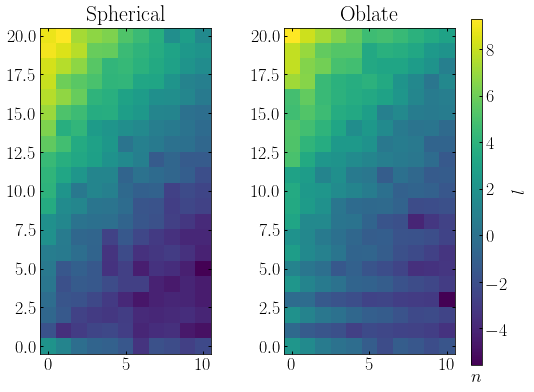

In [55]:
fig = figure(figsize=(8, 6))
subplot(1, 2, 1)
title('Spherical')
im = imshow(np.log10(np.abs(S_biff[:,:,0])).T, origin='lower')
subplot(1, 2, 2)
title('Oblate')
im = imshow(np.log10(np.abs(S_biff_o[:,:,0])).T, origin='lower')

cb_ax = fig.add_axes([0.9, 0.1, 0.02, 0.8])
cbar = fig.colorbar(im, cax=cb_ax)

xlabel('$n$')
ylabel('$l$')

In [25]:
snl(0, 20, 0, m_cut, r_cut, theta, phi, 40.8)

-3.68447129985e-08 (52.6967372193+0j) -2.04745181245e+22


(-118345521.80511218, -3.6844712998523623e-08, (52.696737219291805+0j))

In [26]:
S_biff[0, 20, 0]

-118344916.27963065

In [27]:
S_biff[0,0,0]

154.33824771186164

In [28]:
snl(0, 0, 0, m_cut, r_cut, theta, phi, 40.8)

-151968.390671 (20080.9177524+0j) -3.0


(154.33824671743935, -151968.39067062637, (20080.917752423524+0j))

In [29]:
snl(0, 10, 0, m_cut, r_cut, theta, phi, 40.8)

-0.0530183744204 (-61.386129218+0j) -50097594374.3


(-7931.240641858235, -0.053018374420398647, (-61.386129218010971+0j))

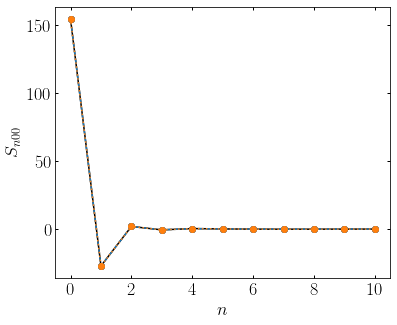

In [92]:
figure(figsize=(6, 5))
plot(np.arange(0, 11, 1), (S_biff[:,0,0]), '-o', c='k' )
plot(np.arange(0, 11, 1), (S_biff2[:,0,0]), '--o', c='C0' )
plot(np.arange(0, 11, 1), (S_biff3[:,0,0]), ':o', c='C1' )

ylabel('$S_{n00}$')
xlabel('$n$')
savefig('S_n_henrquist.pdf')

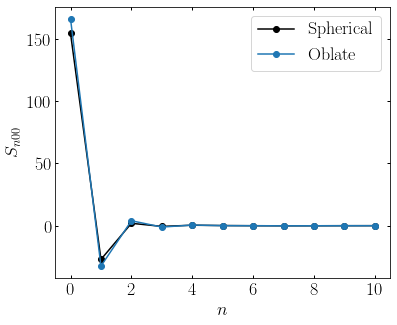

In [34]:
figure(figsize=(6, 5))
plot(np.arange(0, 11, 1), (S_biff[:,0,0]), '-o', c='k', label='Spherical' )
plot(np.arange(0, 11, 1), (S_biff_o[:,0,0]), '-o', c='C0', label='Oblate')

legend()
ylabel('$S_{n00}$')
xlabel('$n$')
savefig('S_n_henrquist_oblate.pdf')

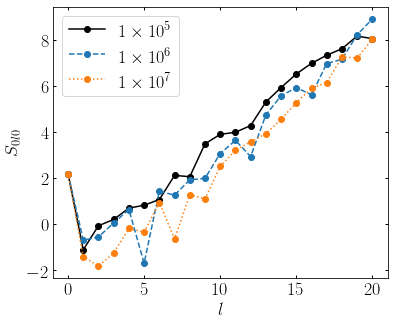

In [91]:
figure(figsize=(6, 5))
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[0,:,0])), '-o', c='k', label=r'$1\times 10^{5}$')
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff2[0,:,0])), '--o', c='C0', label=r'$1\times 10^{6}$' )
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff3[0,:,0])), ':o', c='C1', label=r'$1\times 10^{7}$' )
legend()
ylabel('$S_{0l0}$')
xlabel('$l$')
savefig('S_l_henrquist.pdf')

Text(0.5,0,'$l$')

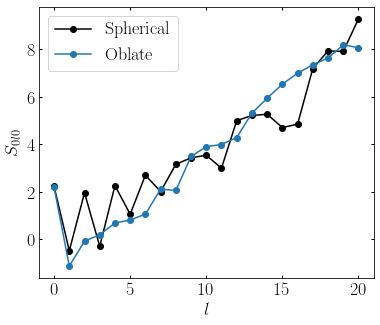

In [48]:
figure(figsize=(6, 5))
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff_o[0,:,0])), '-o', c='k', label='Spherical')
plot(np.arange(0, 21, 1), np.log10(np.abs(S_biff[0,:,0])), '-o', c='C0', label='Oblate')

legend()
ylabel('$S_{0l0}$')
xlabel('$l$')
#savefig('S_l_henrquist_oblate.pdf')

# Computing the energy coefficients $\frac{S_{nlm}^2}{\tilde{A_{nl}}}$

In [36]:
A_nl_array = np.zeros((11, 21))
for j in range(11):
    for i in range(21):
        A_nl_array[j][i] = Anl(j, i)

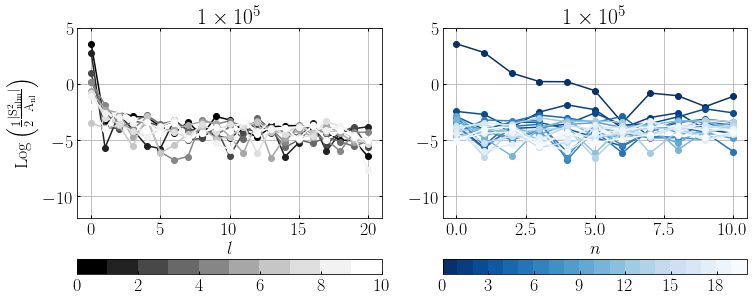

In [45]:
figure(figsize=(12, 5))

c1 = np.arange(1., 10 + 1)
cmap1 = plt.get_cmap("Greys_r", len(c1))
norm1 = matplotlib.colors.BoundaryNorm(np.arange(len(c1)+1),len(c1))
sm1 = plt.cm.ScalarMappable(norm=norm1, cmap=cmap1)
sm1.set_array([])

c2 = np.arange(1., 20 + 1)
cmap2 = plt.get_cmap("Blues_r", len(c2))
norm2 = matplotlib.colors.BoundaryNorm(np.arange(len(c2)+1),len(c2))
sm2 = plt.cm.ScalarMappable(norm=norm2, cmap=cmap2)
sm2.set_array([])

subplot(1, 2, 1)
title(r'$1\times 10^{5}$')

for i in range(10):
    plot(np.arange(0, 21, 1), np.log10(np.abs(0.5*S_biff[i,:,0]**2/A_nl_array[i])), '-o', c=cmap1(i))

colorbar(sm1, orientation='horizontal')
xlabel('$l$')
ylabel(r'$\rm{Log}\left(\frac{1}{2}\frac{|S_{nlm}^2|}{A_{nl}}\right)$')
ylim(-12, 5)
grid()

subplot(1, 2, 2)
title(r'$1\times 10^{5}$')
for i in range(20):
    plot(np.arange(0, 11, 1), np.log10(np.abs(0.5*S_biff[:,i,0]**2/A_nl_array[:,i])), '-o', c=cmap2(i))
colorbar(sm2, orientation='horizontal')
xlabel('$n$')
ylim(-12, 5)
grid()
#savefig('energy_terms_hern_a_40_1E5.pdf', bbox_inches='tight')

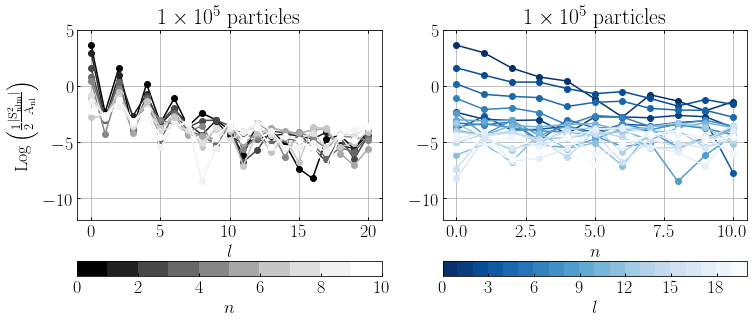

In [49]:
figure(figsize=(12, 5))
subplot(1, 2, 1)
title(r'$1\times 10^{5}$ particles')

for i in range(10):
    plot(np.arange(0, 21, 1), np.log10(0.5*np.abs(S_biff_o[i,:,0]**2/A_nl_array[i])), '-o', c=cmap1(i))

cbar = colorbar(sm1, orientation='horizontal')
cbar.set_label('$n$')

xlabel('$l$')
ylabel(r'$\rm{Log}\left(\frac{1}{2}\frac{|S_{nlm}^2|}{A_{nl}}\right)$')
ylim(-12, 5)
grid()

subplot(1, 2, 2)
title(r'$1\times 10^{5}$ particles')
for i in range(20):
    plot(np.arange(0, 11, 1), np.log10(0.5*np.abs(S_biff_o[:,i,0]**2/A_nl_array[:,i])), '-o', c=cmap2(i))
cbar = colorbar(sm2, orientation='horizontal')
cbar.set_label('$l$')

xlabel('$n$')
ylim(-12, 5)
grid()

savefig('energy_terms_oblate_hern_a_40_1E5.pdf', bbox_inches='tight')

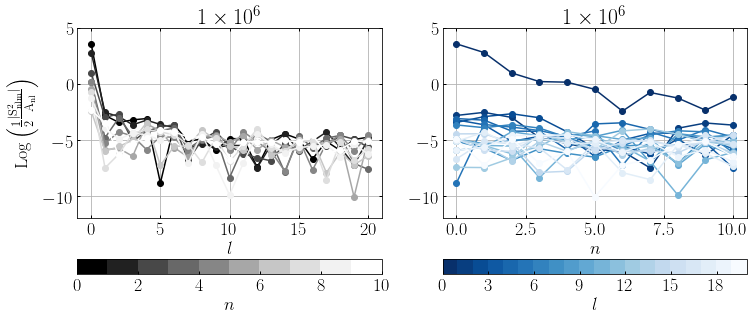

In [68]:
figure(figsize=(12, 5))

c1 = np.arange(1., 10 + 1)
cmap1 = plt.get_cmap("Greys_r", len(c1))
norm1 = matplotlib.colors.BoundaryNorm(np.arange(len(c1)+1),len(c1))
sm1 = plt.cm.ScalarMappable(norm=norm1, cmap=cmap1)
sm1.set_array([])

c2 = np.arange(1., 20 + 1)
cmap2 = plt.get_cmap("Blues_r", len(c2))
norm2 = matplotlib.colors.BoundaryNorm(np.arange(len(c2)+1),len(c2))
sm2 = plt.cm.ScalarMappable(norm=norm2, cmap=cmap2)
sm2.set_array([])

subplot(1, 2, 1)
title(r'$1\times 10^{6}$')
for i in range(10):
    plot(np.arange(0, 21, 1), np.log10(np.abs(0.5*S_biff2[i,:,0]**2/A_nl_array[i])), '-o', c=cmap1(i))

cbar = colorbar(sm1, orientation='horizontal')
cbar.set_label('$n$')

xlabel('$l$')
ylabel(r'$\rm{Log}\left(\frac{1}{2}\frac{|S_{nlm}^2|}{A_{nl}}\right)$')
ylim(-12, 5)
grid()

subplot(1, 2, 2)
title(r'$1\times 10^{6}$')
for i in range(20):
    plot(np.arange(0, 11, 1), np.log10(np.abs(0.5*S_biff2[:,i,0]**2/A_nl_array[:,i])), '-o', c=cmap2(i))
cbar = colorbar(sm2, orientation='horizontal')
cbar.set_label('$l$')

xlabel('$n$')
ylim(-12, 5)
grid()

savefig('energy_terms_hern_a_40_1E6.pdf', bbox_inches='tight')

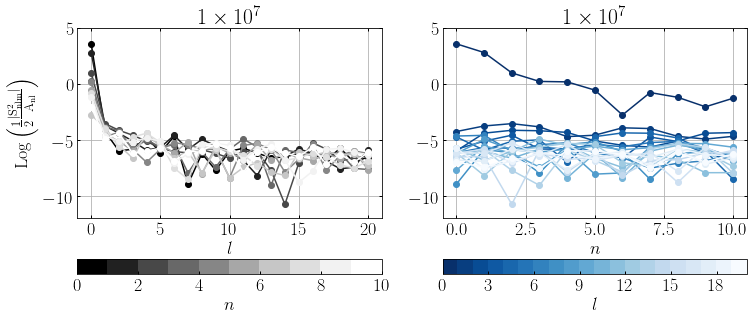

In [69]:
figure(figsize=(12, 5))

c1 = np.arange(1., 10 + 1)
cmap1 = plt.get_cmap("Greys_r", len(c1))
norm1 = matplotlib.colors.BoundaryNorm(np.arange(len(c1)+1),len(c1))
sm1 = plt.cm.ScalarMappable(norm=norm1, cmap=cmap1)
sm1.set_array([])

c2 = np.arange(1., 20 + 1)
cmap2 = plt.get_cmap("Blues_r", len(c2))
norm2 = matplotlib.colors.BoundaryNorm(np.arange(len(c2)+1),len(c2))
sm2 = plt.cm.ScalarMappable(norm=norm2, cmap=cmap2)
sm2.set_array([])

subplot(1, 2, 1)
title(r'$1\times 10^{7}$')
for i in range(10):
    plot(np.arange(0, 21, 1), np.log10(np.abs(0.5*S_biff3[i,:,0]**2/A_nl_array[i])), '-o', c=cmap1(i))

cbar = colorbar(sm1, orientation='horizontal')
cbar.set_label('$n$')

xlabel('$l$')
ylabel(r'$\rm{Log}\left(\frac{1}{2} \frac{|S_{nlm}^2|}{A_{nl}}\right)$')
ylim(-12, 5)
grid()

subplot(1, 2, 2)
title(r'$1\times 10^{7}$')
for i in range(20):
    plot(np.arange(0, 11, 1), np.log10(np.abs(0.5*S_biff3[:,i,0]**2/A_nl_array[:,i])), '-o', c=cmap2(i))
cbar = colorbar(sm2, orientation='horizontal')
cbar.set_label('$l$')
xlabel('$n$')
ylim(-12, 5)
grid()
savefig('energy_terms_hern_a_40_1E7.pdf', bbox_inches='tight')

In [ ]:
A_nl_t = np.zeros(20)
for i in range(0, 20):
    A_nl_t[i] = Anl(0, i)

In [200]:
pot = biff.potential(np.ascontiguousarray(np.array([np.arange(1, 300, 1), np.zeros(299), np.zeros(299)]).T), S_biff, T_biff, G=1, M=np.sum(m_cut), r_s=40.8)

In [201]:
dens = biff.density(np.ascontiguousarray(np.array([np.arange(1, 300, 1), np.zeros(299), np.zeros(299)]).T), S_biff, T_biff, M=np.sum(m_cut), r_s=40.8)

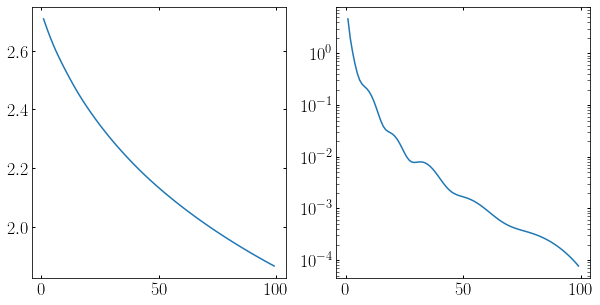

In [197]:
figure(figsize(10, 5))
subplot(1, 2, 1)
plot(np.arange(1, 100, 1), np.log10((-pot)))

subplot(1, 2, 2)
semilogy(np.arange(1, 100, 1), dens)

## The contribution of the coefficients to the density and potential.

- What is the value of the potential as a function of $n$ and $l$? 

In [1]:
def potential_density(S, T, n, l, m, a,  r):
    theta = 0
    phi = 0
    rho_nlm = np.zeros(len(r))
    phi_nlm = np.zeros(len(r))
    j=0
    for i in r:
        rho_nlm[j] = special.sph_harm(m, l, 0, theta).real * rho_nl(n, l, i, a)*(S*cos(m*phi) + T*sin(m*phi))
        phi_nlm[j] = special.sph_harm(m, l, 0, theta).real * phi_nl(n, l, i, a)*(S*cos(m*phi) + T*sin(m*phi))
        j+=1
    
    return rho_nlm, phi_nlm


In [2]:
r_eval = np.linspace(1, 300, 100)
rho_eval_l = np.zeros((20,100))
phi_eval_l = np.zeros((20,100))

for i in range(0, 20):
    rho_eval_l[i], phi_eval_l[i] = potential_density(S_biff[0,i,0], T_biff[0,i,0], 0, i, 0, 40.8, r_eval)

NameError: name 'np' is not defined

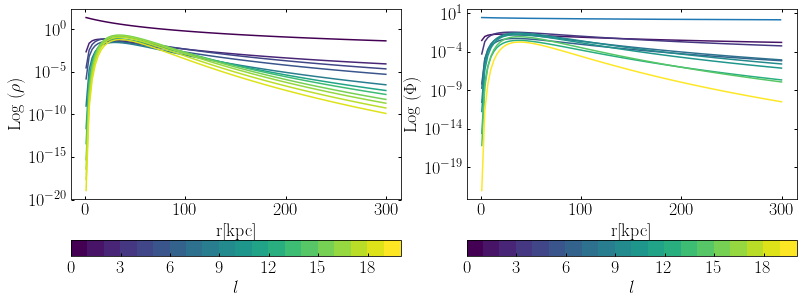

In [203]:
figure(figsize=(13, 5))
subplot(1, 2, 1)
c1 = np.arange(1., 20 + 1)
cmap1 = plt.get_cmap("viridis", len(c1))
norm1 = matplotlib.colors.BoundaryNorm(np.arange(len(c1)+1),len(c1))
sm1 = plt.cm.ScalarMappable(norm=norm1, cmap=cmap1)
sm1.set_array([])

for i in range(20):
    semilogy(r_eval, rho_eval_l[i], c=cmap1(i))
xlabel(r'$\rm{r[kpc]}$')
ylabel(r'Log $(\rho)$')

cbar = colorbar(sm1, orientation='horizontal')
cbar.set_label('$l$')


subplot(1, 2, 2)
plot(np.arange(1, 300, 1), np.log10((-pot)))

for i in range(20):
    semilogy(r_eval, phi_eval_l[i], c=cmap1(i))
xlabel(r'$\rm{r[kpc]}$')
ylabel(r'Log $(\Phi)$')

cbar = colorbar(sm1, orientation='horizontal')
cbar.set_label('$l$')

(0.0001, 10)

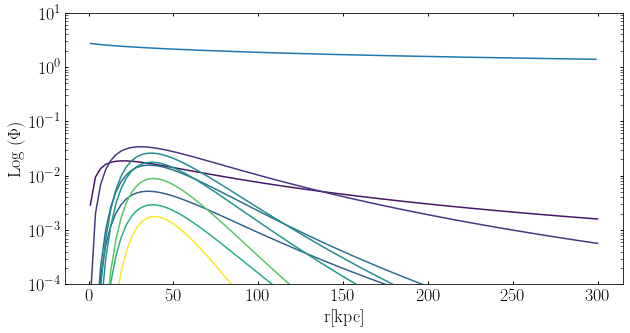

In [207]:
plot(np.arange(1, 300, 1), np.log10((-pot)))

for i in range(20):
    semilogy(r_eval, phi_eval_l[i], c=cmap1(i))
xlabel(r'$\rm{r[kpc]}$')
ylabel(r'Log $(\Phi)$')

ylim(1E-4, 10)